<a href="https://colab.research.google.com/github/Basu8971/Materraproject/blob/main/DOS%20Rainfall%20Locations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

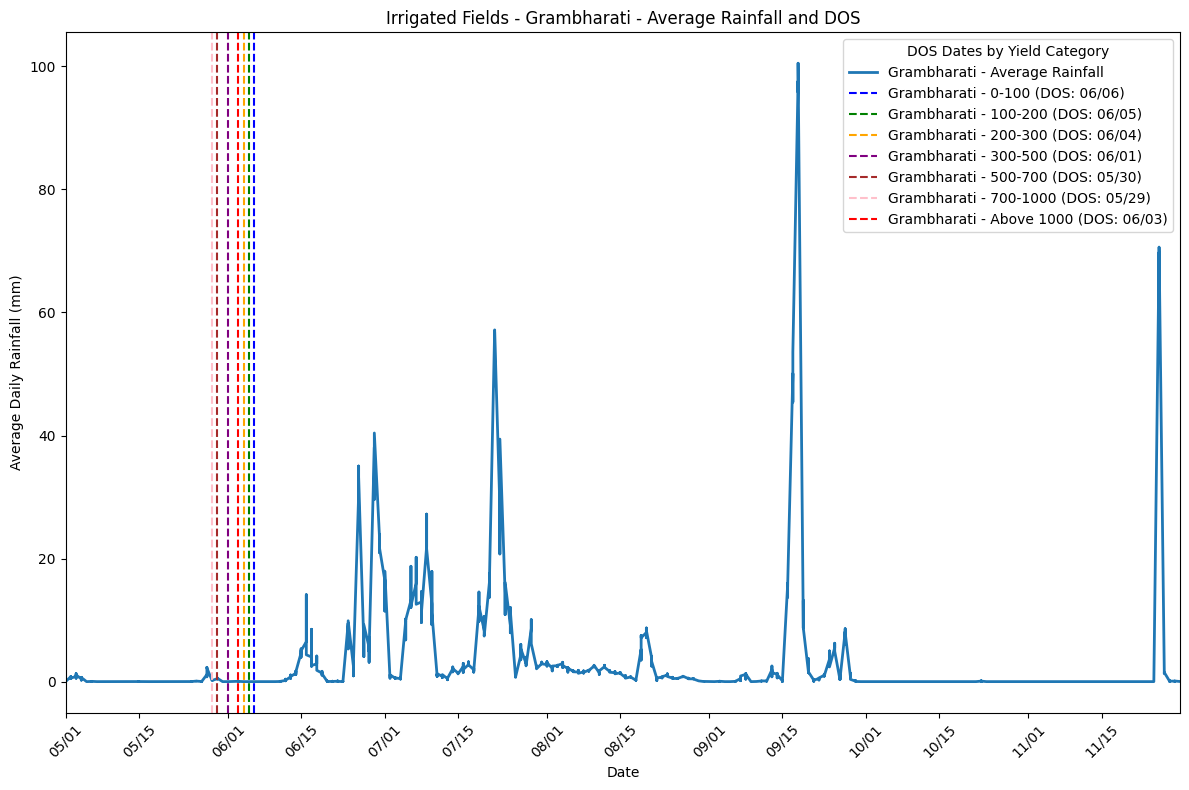

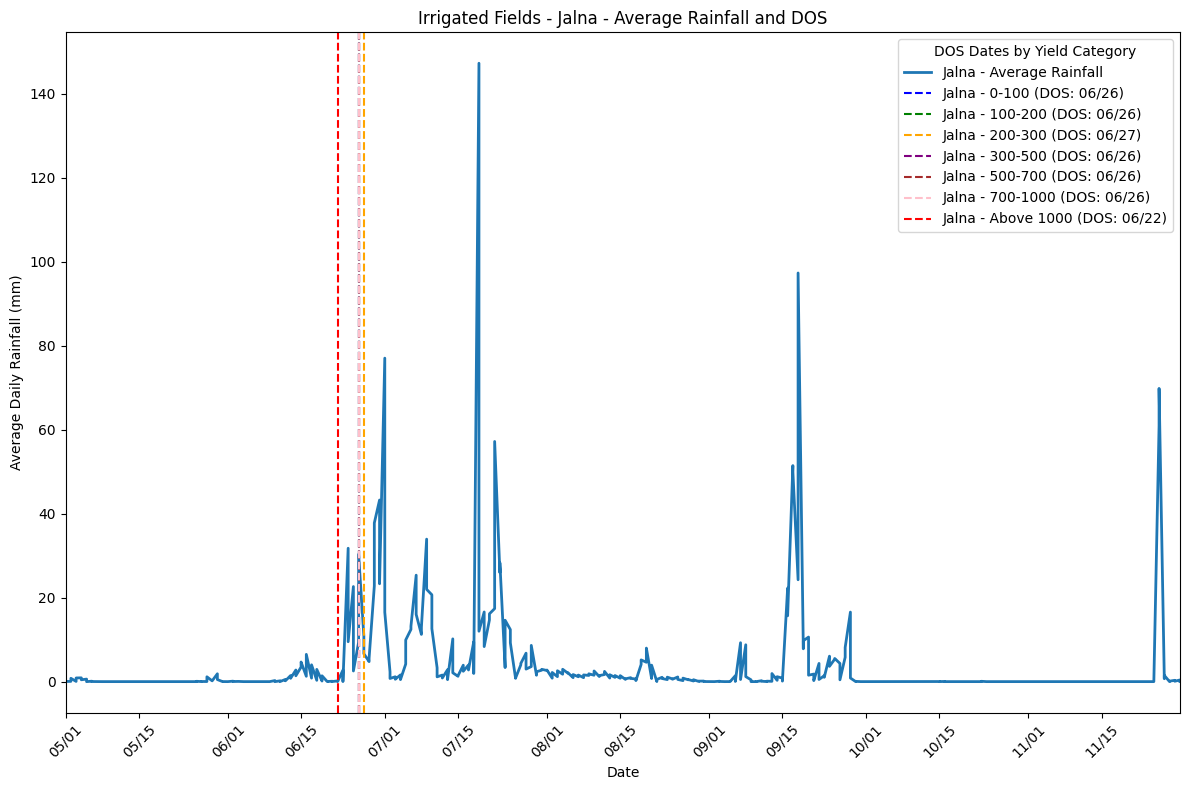

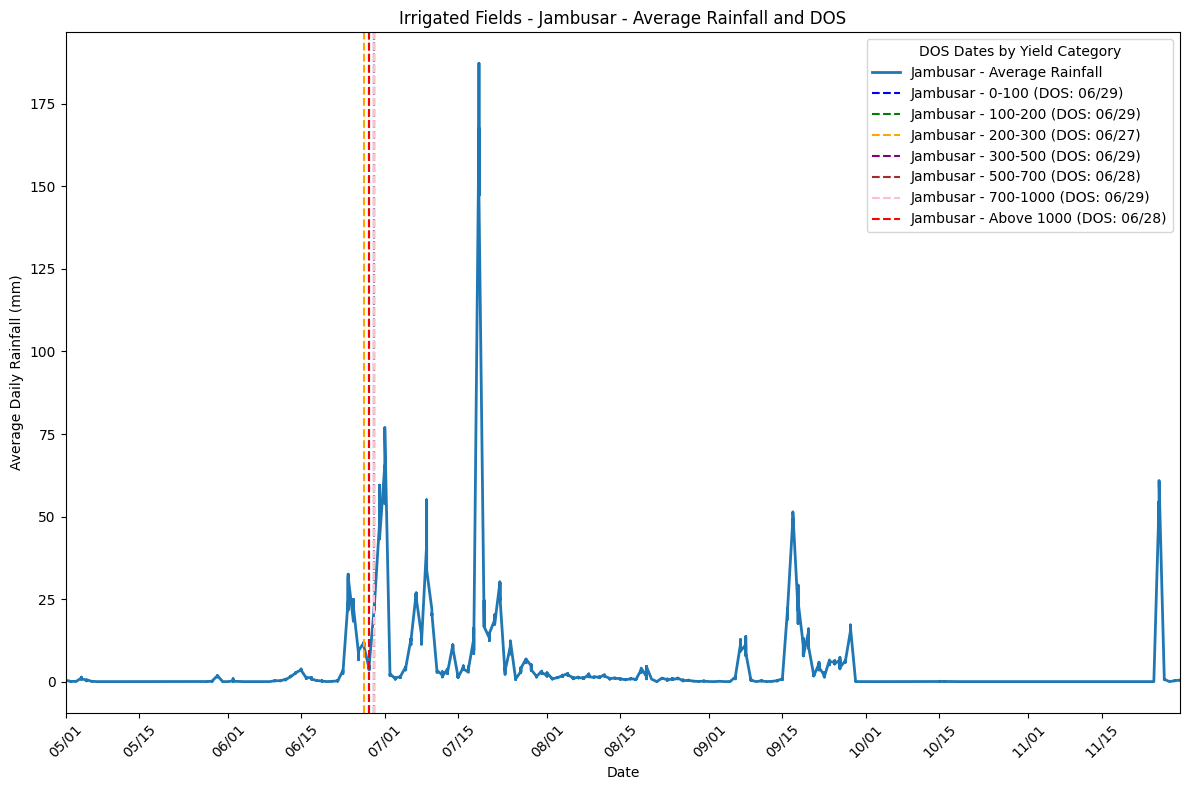

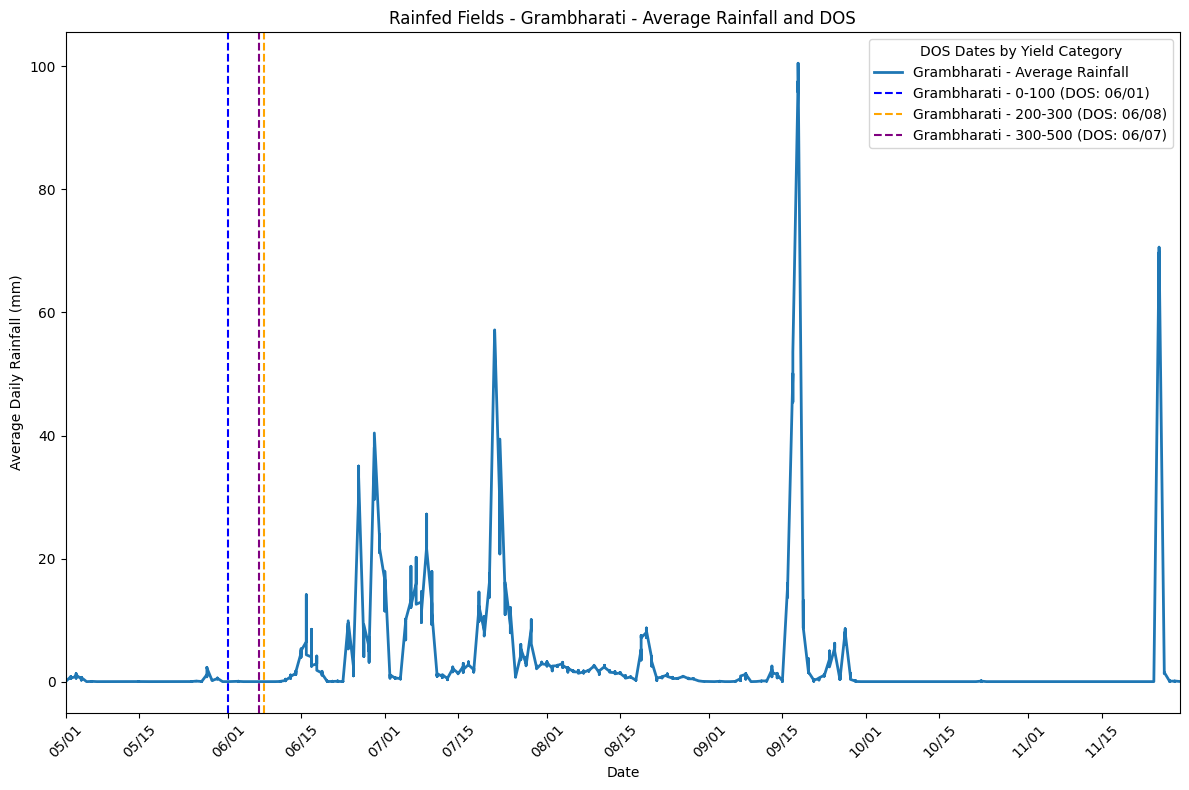

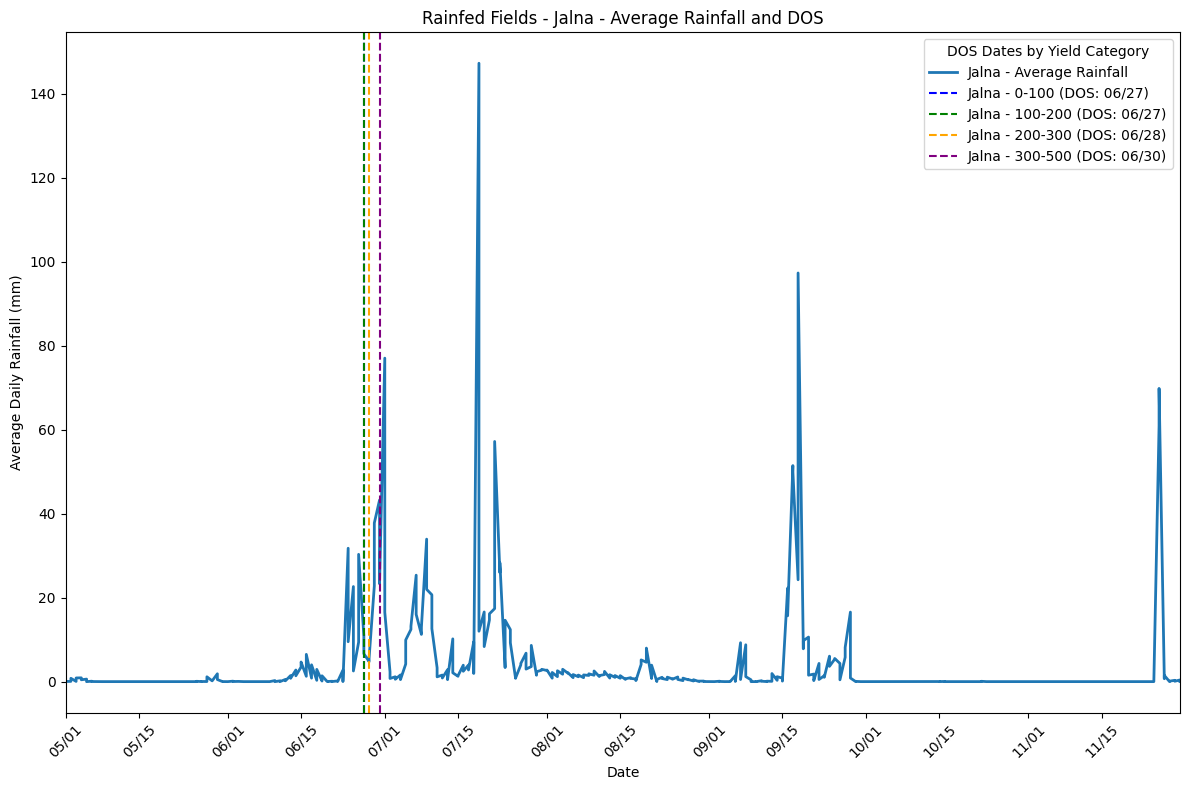

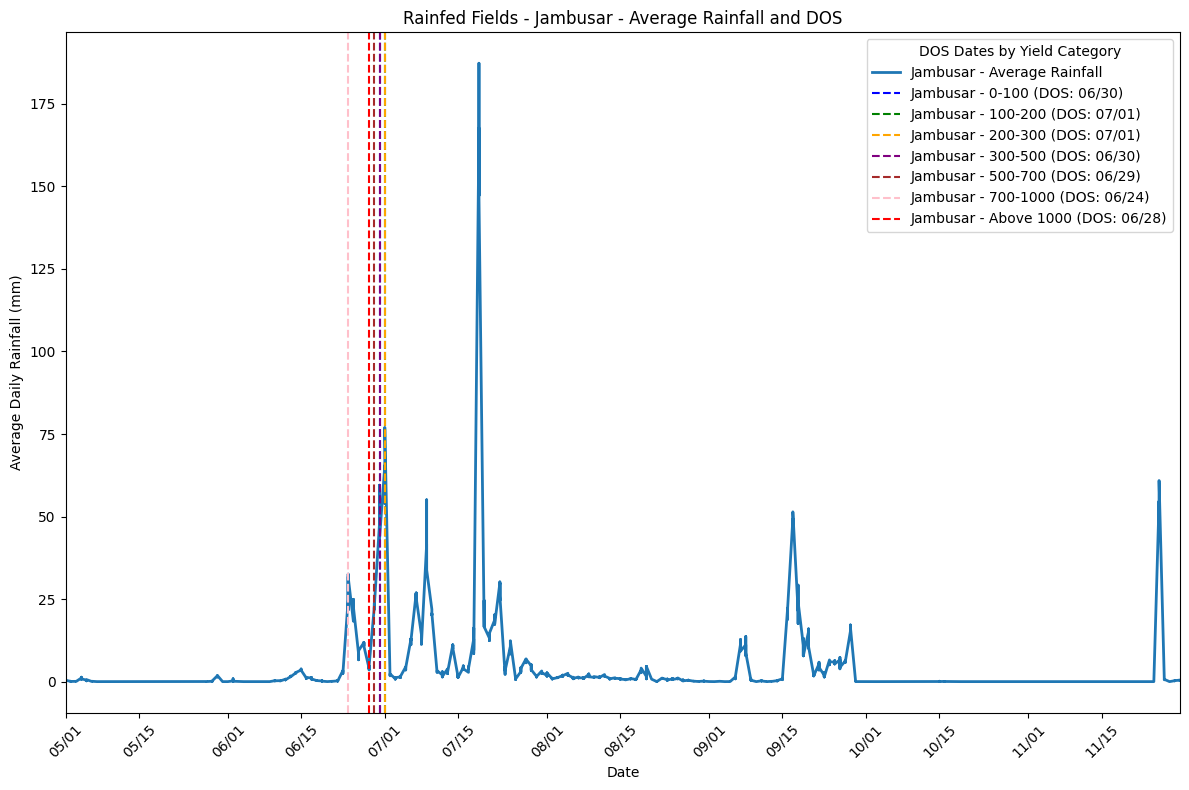

In [96]:
# Step 1: Install necessary libraries (if not already installed)
!pip install --upgrade gspread google-auth pandas matplotlib seaborn

# Step 2: Authenticate with Google using google-auth
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Authenticate the Google account
auth.authenticate_user()

# Use google-auth to get credentials and authorize gspread
creds, _ = default()
gc = gspread.authorize(creds)

# Step 3: Access Google Sheets using URLs for the rainfall data sheet
rainfall_sheet_url = 'https://docs.google.com/spreadsheets/d/1306_u0hDxwOzAnAfghxXoam2lh6Pj10VIh8jBWU6ppU/edit?gid=1526811364#gid=1526811364'

# Open the Google Sheet using gspread for the rainfall data
rainfall_sheet = gc.open_by_url(rainfall_sheet_url)

# Load the data from the sheet into DataFrame (Rainfall data)
rainfall_data = pd.DataFrame(rainfall_sheet.sheet1.get_all_records())  # Rainfall data

# Step 4: Clean and process the data (strip extra spaces)
rainfall_data.columns = rainfall_data.columns.str.strip()

# Step 5: Convert 'Date' to datetime format
rainfall_data['Date'] = pd.to_datetime(rainfall_data['Date'], errors='coerce')

# Step 6: Filter data for the date range (May 1, 2023 to Nov 30, 2023)
filtered_rainfall_data = rainfall_data[(rainfall_data['Date'].dt.year == 2023) &
                                        (rainfall_data['Date'].dt.month >= 5) &
                                        (rainfall_data['Date'].dt.month <= 11)]

# Step 7: Extract Day of Year from 'Date' for plotting (DOY 1 to 365/366)
filtered_rainfall_data = filtered_rainfall_data.copy()  # Avoid SettingWithCopyWarning
filtered_rainfall_data['DayOfYear'] = filtered_rainfall_data['Date'].dt.dayofyear

# Step 8: Group by Location and DayOfYear, and calculate the average rainfall for each location
location_groups = filtered_rainfall_data.groupby(['Location', 'DayOfYear'])['precipitation'].mean().reset_index()

# Step 9: Convert DayOfYear to actual dates for plotting
location_groups['Date'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(location_groups['DayOfYear'] - 1, unit='D')

# Step 10: Define the Date of Sowing (DOS) for each location and yield category (Irrigated fields)
dos_dates = {
    # For Grambharati
    ('Grambharati', '0-100'): pd.to_datetime('2023-06-06'),
    ('Grambharati', '100-200'): pd.to_datetime('2023-06-05'),
    ('Grambharati', '200-300'): pd.to_datetime('2023-06-04'),
    ('Grambharati', '300-500'): pd.to_datetime('2023-06-01'),
    ('Grambharati', '500-700'): pd.to_datetime('2023-05-30'),
    ('Grambharati', '700-1000'): pd.to_datetime('2023-05-29'),
    ('Grambharati', 'Above 1000'): pd.to_datetime('2023-06-03'),

    # For Jalna
    ('Jalna', '0-100'): pd.to_datetime('2023-06-26'),
    ('Jalna', '100-200'): pd.to_datetime('2023-06-26'),
    ('Jalna', '200-300'): pd.to_datetime('2023-06-27'),
    ('Jalna', '300-500'): pd.to_datetime('2023-06-26'),
    ('Jalna', '500-700'): pd.to_datetime('2023-06-26'),
    ('Jalna', '700-1000'): pd.to_datetime('2023-06-26'),
    ('Jalna', 'Above 1000'): pd.to_datetime('2023-06-22'),

    # For Jambusar
    ('Jambusar', '0-100'): pd.to_datetime('2023-06-29'),
    ('Jambusar', '100-200'): pd.to_datetime('2023-06-29'),
    ('Jambusar', '200-300'): pd.to_datetime('2023-06-27'),
    ('Jambusar', '300-500'): pd.to_datetime('2023-06-29'),
    ('Jambusar', '500-700'): pd.to_datetime('2023-06-28'),
    ('Jambusar', '700-1000'): pd.to_datetime('2023-06-29'),
    ('Jambusar', 'Above 1000'): pd.to_datetime('2023-06-28')
}

# Rainfed DOS Dates (separate set for rainfed conditions)
rainfed_dos_dates = {
    # For Grambharati
    ('Grambharati', '0-100'): pd.to_datetime('2023-06-01'),
    ('Grambharati', '100-200'): None,
    ('Grambharati', '200-300'): pd.to_datetime('2023-06-08'),
    ('Grambharati', '300-500'): pd.to_datetime('2023-06-07'),
    ('Grambharati', '500-700'): None,
    ('Grambharati', '700-1000'): None,
    ('Grambharati', 'Above 1000'): None,

    # For Jalna
    ('Jalna', '0-100'): pd.to_datetime('2023-06-27'),
    ('Jalna', '100-200'): pd.to_datetime('2023-06-27'),
    ('Jalna', '200-300'): pd.to_datetime('2023-06-28'),
    ('Jalna', '300-500'): pd.to_datetime('2023-06-30'),
    ('Jalna', '500-700'): None,
    ('Jalna', '700-1000'): None,
    ('Jalna', 'Above 1000'): None,

    # For Jambusar
    ('Jambusar', '0-100'): pd.to_datetime('2023-06-30'),
    ('Jambusar', '100-200'): pd.to_datetime('2023-07-01'),
    ('Jambusar', '200-300'): pd.to_datetime('2023-07-01'),
    ('Jambusar', '300-500'): pd.to_datetime('2023-06-30'),
    ('Jambusar', '500-700'): pd.to_datetime('2023-06-29'),
    ('Jambusar', '700-1000'): pd.to_datetime('2023-06-24'),
    ('Jambusar', 'Above 1000'): pd.to_datetime('2023-06-28')
}

# Colors for plotting
color_map = {
    '0-100': 'blue',
    '100-200': 'green',
    '200-300': 'orange',
    '300-500': 'purple',
    '500-700': 'brown',
    '700-1000': 'pink',
    'Above 1000': 'red'
}

# Step 11: Plotting for both Irrigated and Rainfed Data
# Helper function to plot for both conditions
def plot_dos_graph(data, dos_dates, location, title):
    location_data = data[data['Location'] == location]
    plt.figure(figsize=(12, 8))

    # Plotting the average rainfall for the location
    plt.plot(location_data['Date'], location_data['precipitation'], label=f'{location} - Average Rainfall', linewidth=2)

    # Plotting the Date of Sowing (DOS) lines
    for yield_category, event_date in dos_dates.items():
        if yield_category[0] == location:
            if event_date:  # Only plot if there's a valid date
                color = color_map.get(yield_category[1], 'black')
                plt.axvline(event_date, color=color, linestyle='--', label=f'{location} - {yield_category[1]} (DOS: {event_date.strftime("%m/%d")})')

    # Customize the plot
    plt.xlabel('Date')
    plt.ylabel('Average Daily Rainfall (mm)')
    plt.title(title)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    plt.xlim(pd.to_datetime('2023-05-01'), pd.to_datetime('2023-11-30'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=(1, 15)))
    plt.xticks(rotation=45)
    plt.legend(title='DOS Dates by Yield Category')
    plt.tight_layout()
    plt.show()

# Plot for Grambharati (Irrigated)
plot_dos_graph(filtered_rainfall_data, dos_dates, 'Grambharati', 'Irrigated Fields - Grambharati - Average Rainfall and DOS')

# Plot for Jalna (Irrigated)
plot_dos_graph(filtered_rainfall_data, dos_dates, 'Jalna', 'Irrigated Fields - Jalna - Average Rainfall and DOS')

# Plot for Jambusar (Irrigated)
plot_dos_graph(filtered_rainfall_data, dos_dates, 'Jambusar', 'Irrigated Fields - Jambusar - Average Rainfall and DOS')

# Plot for Grambharati (Rainfed)
plot_dos_graph(filtered_rainfall_data, rainfed_dos_dates, 'Grambharati', 'Rainfed Fields - Grambharati - Average Rainfall and DOS')

# Plot for Jalna (Rainfed)
plot_dos_graph(filtered_rainfall_data, rainfed_dos_dates, 'Jalna', 'Rainfed Fields - Jalna - Average Rainfall and DOS')

# Plot for Jambusar (Rainfed)
plot_dos_graph(filtered_rainfall_data, rainfed_dos_dates, 'Jambusar', 'Rainfed Fields - Jambusar - Average Rainfall and DOS')
